https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data/code

In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #benzerlik skoru
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_offer = pd.read_csv("portfolio.csv")

df_customer = pd.read_csv("profile.csv")

df_transcript = pd.read_csv("transcript.csv")


In [3]:
df_offer.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
df_customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
df_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [6]:
df_offer = df_offer.drop('Unnamed: 0', axis = 1)
df_customer = df_customer.drop('Unnamed: 0', axis = 1)
df_transcript = df_transcript.drop('Unnamed: 0', axis = 1)

In [7]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [9]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [10]:
df_customer.dropna()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [11]:
customer = df_customer[["id","income"]]

In [12]:
customer["income"].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 47 to 16997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1926 non-null   object 
 1   income  1926 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.1+ KB


Starbuksta alişveriş yapan müşterilen sıklığına göre kümelenmesi

In [15]:
df_transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [16]:
frequency= pd.DataFrame(df_transcript['person'].value_counts()).reset_index()
frequency.columns =["person", "frequency",]
frequency

,person,frequency
0,94de646f7b6041228ca7dec82adb97d2,51
1,8dbfa485249f409aa223a2130f40634a,49
2,d0a80415b84c4df4908b8403b19765e3,48
3,5e60c6aa3b834e44b822ea43a3efea26,48
4,79d9d4f86aca4bed9290350fb43817c2,48
...,...,...
16995,afd41b230f924f9ca8f5ed6249616114,2
16996,3a4e53046c544134bb1e7782248631d1,2
16997,e63e42480aae4ede9f07cac49c8c3f78,2
16998,7ecfc592171f4844bdc05bdbb48d3847,2


In [17]:
frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person     17000 non-null  object
 1   frequency  17000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 265.8+ KB


Verimiz ypğun olduğu için rastegele 500 tanesini sınıflandıracağım

In [24]:
frequency = frequency.sample(500)

data_cus1_dummy = pd.get_dummies(frequency , drop_first = True)



number of cluster 2, silhouette 0.5494503871864042
number of cluster 3, silhouette 0.4895004562656432
number of cluster 4, silhouette 0.46686019723384165
number of cluster 5, silhouette 0.4572016282104637
number of cluster 6, silhouette 0.4411175252949679
number of cluster 7, silhouette 0.4054679513872744
number of cluster 8, silhouette 0.37561229886418457
number of cluster 9, silhouette 0.37047116888928916
number of cluster 10, silhouette 0.37275243029598826


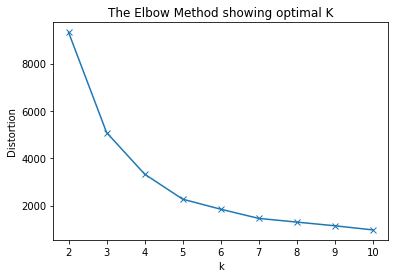

In [25]:

def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in np.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show()
cluster(data_cus1_dummy,10)

In [28]:
model = KMeans(n_clusters = 3)

model = model.fit(data_cus1_dummy)

pred = model.predict(data_cus1_dummy)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


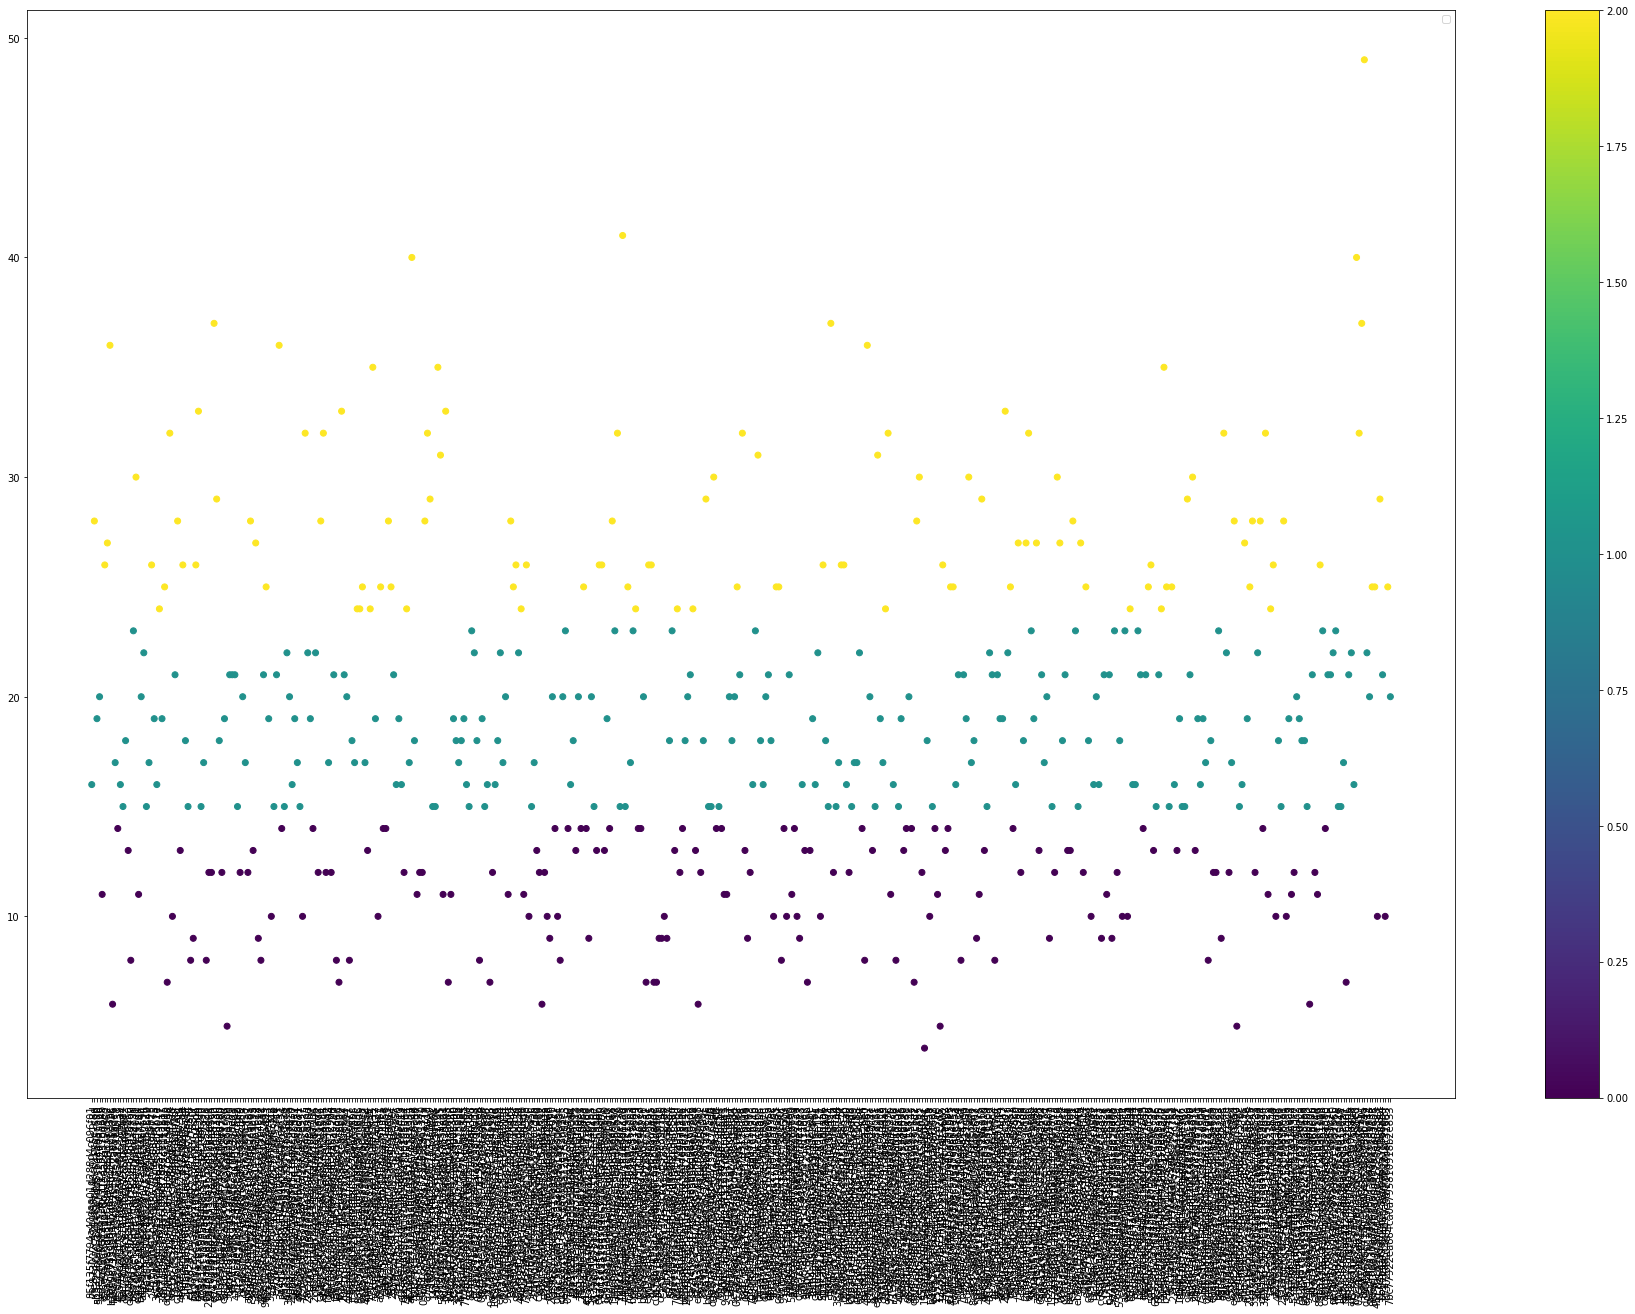

In [29]:
plt.figure(figsize = (32,20))  
plt.scatter(frequency["person"],frequency["frequency"] , c = pred)
plt.legend()
plt.xticks(rotation = 90)
plt.colorbar()
plt.show() 

In [30]:
frequency["clust(frequency)"] = pred
frequency

,person,frequency,clust(frequency)
9733,85f135f7794a40daa01d288d4c096f01,16,1
1627,7fe873022c4749f88bb40c01bc5e1c8d,28,2
6719,ab3329c070784ce6b7dd5c64ed65c69b,19,1
5823,523e72f640ea4855a1648326440d1368,20,1
14166,efcab1965e89471fb11f135b2978d64b,11,0
...,...,...,...
1150,917c54dadd014c42bc06a2317d98b8bf,29,2
5097,bb94b4af9efd4d278abbabba188a8a54,21,1
15368,7174aa5c3c4040a090fd8101bf596f3f,10,0
2887,8f30238504d3473c88f216a4bec31503,25,2
